In [25]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
plt.rcParams['axes.formatter.useoffset'] = False

In [93]:
kaplan = xr.open_dataset('/home/julia/repositorios/ENSO_ajuste/sst.mon.anom_remap.nc')
daily_nino = xr.open_dataset('/home/julia/repositorios/ENSO_ajuste/inino34_daily.nc')

In [108]:
#@title
#Funciones
from scipy import signal
from scipy import fftpack
def plot_espectro(senal,xmax,ymax):
    X = fftpack.fft(senal)
    plt.plot(fftpack.fftfreq(len(t[:]),1./365.), np.abs(X))
    plt.ylim(0, ymax)
    plt.xlim(0, xmax)
    plt.xlabel('freq [años$^{-1}$]')
    plt.show()

from scipy.signal import filtfilt
def PasaBajos(senal):
  fs = 365 #pienso en años, como la unidad es el año, mi frec de muestreo es 365 muestras por año (señal en días)
  frec_c = 1.2 #Tres muestras por año o sea frecuencia de corte es un trimestre (2 sería 6 meses y es demasiado)
  nyq = .5*fs #Nysquits para pasarle al filtro
  frec = frec_c / nyq 
  orden = 6
  b,a = scipy.signal.butter(orden,frec,'low',analog=False,output='ba') #Filtro butterworth
  y = scipy.signal.filtfilt(b,a,senal,axis=0)
  return y


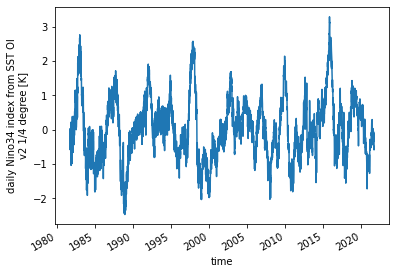

In [68]:
kaplan_nino34 = kaplan.sel(lat=slice(5,-5)).sel(lon=slice(190,240)).mean(dim='lat').mean(dim='lon')
daily_nino.Nino34.plot()

In [109]:
daily_nino = daily_nino.fillna(daily_nino.mean())
daily_nino.time

import scipy
N = len(kaplan_nino34.sst.values)
rate = 365
L = N/rate
t = np.arange(N) / rate
nino_filtrado = PasaBajos(daily_nino.Nino34.values)
#corregido_aux, moving_average = remover_ma(nino_filtrado,8*365)
#corregido1, moving_average2 = remover_ma(corregido_aux,8*365)

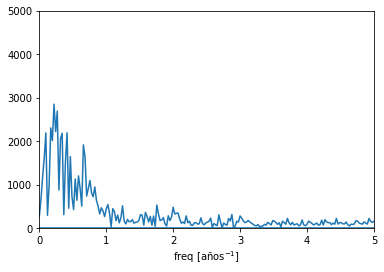

In [110]:
N = len(daily_nino.Nino34)
rate = 365
L = N/rate
t = np.arange(N) / rate
plot_espectro(daily_nino.Nino34.values,5,5000)

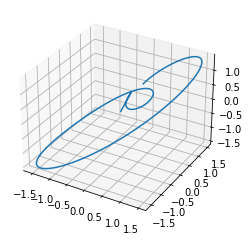

In [135]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
x = nino_filtrado[10000:10000 + 3*365]
x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(60,len(x)):
    x1d[i]=-x[i-30]
    x2d[i]=-x[i-60]
    x0d[i]=-x[i]

mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.plot(x0d,x1d,x2d ,label="ajuste datos sinteticos")
#ax.plot(x1d,x2d,x0d,label="ajuste datos sinteticos")
#